In [28]:
!conda info --envs

# conda environments:
#
base                     /home/diego/anaconda3
ic                    *  /home/diego/anaconda3/envs/ic
tcc                      /home/diego/anaconda3/envs/tcc



In [29]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.math import sigmoid
from datetime import datetime
from tensorflow import keras
import graphviz

sns.set()

In [31]:
def gen_data_cloud(n):
    X = []
    y = []
    
    y_axis = np.linspace(-2, 2, n)
    x1 = np.linspace(-1.5, -0.5, n)
    x2 = np.linspace(0.5, 1.5, n)

    x1v, y1v = np.meshgrid(x1, y_axis)
    x2v, y2v = np.meshgrid(x2, y_axis)

    for i in range(n):
        for j in range(n):
            
            _x1 = x1v[j,i]
            _y1 = y1v[j,i]

            _x2 = x2v[j,i]
            _y2 = y2v[j,i]

            X.append( (_x1, _y1) )
            y.append([1, 0])
            
            X.append( (_x2, _y2) )
            y.append([0, 1])

    return np.array(X), np.array(y)

In [47]:
def build_nn_graph(layers):
    graph = {}

    for layer_index, layer in enumerate(layers):
        W = layer.weights[0].numpy()
        b = layer.weights[1].numpy()

        prev_nodes_lenght = W.shape[0]
        current_nodes_lenght = W.shape[1]

        layer_graph = graph.get(layer_index, [])

        for i in range(prev_nodes_lenght):
            for j in range(current_nodes_lenght):
                layer_graph.append((
                    "layer-{}-node-{}".format(layer_index, i),
                    "layer-{}-node-{}".format(layer_index+1, j), 
                    {'weight': W[i, j]}
                ))

        graph[layer_index] = layer_graph


    return graph

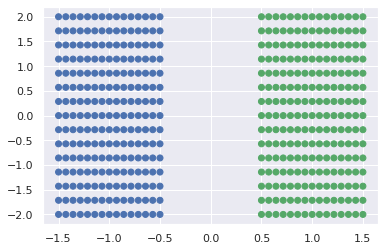

In [33]:
X, y = gen_data_cloud(15)

y_class = np.argmax(y, axis=1)
c = []

for i in y_class:
    if i == 0:
        c.append("b")
    else:
        c.append("g")


plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [48]:
X, y = gen_data_cloud(15)


weights_cloud_l0_1 = []
bias_cloud_l0_1 = []
acc_cloud_1 = []

for i in range(1):
    print("Treinando rede {}..".format(i))
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(
            5,
            activation="sigmoid"
        ),
        tf.keras.layers.Dense(
            4,
            activation="sigmoid"
        ),
        tf.keras.layers.Dense(
            2,
            activation="sigmoid"
        )
    ])

    model.compile(
        loss='mean_squared_error',
        metrics=["accuracy"]
    )

    hist = model.fit(
        X,
        y,
        epochs=60,
        batch_size=3,
        verbose=0
    )
    
    layers = model.layers
    print()
    print("Accuracy: {}".format(hist.history["accuracy"][-1]))
    print(build_nn_graph(model.layers))

Treinando rede 0..

Accuracy: 1.0
{0: [('layer-0-node-0', 'layer-1-node-0', {'weight': 4.4273286}), ('layer-0-node-0', 'layer-1-node-1', {'weight': -4.0828123}), ('layer-0-node-0', 'layer-1-node-2', {'weight': -3.8120403}), ('layer-0-node-0', 'layer-1-node-3', {'weight': 4.1871204}), ('layer-0-node-0', 'layer-1-node-4', {'weight': -3.625794}), ('layer-0-node-1', 'layer-1-node-0', {'weight': -0.02816641}), ('layer-0-node-1', 'layer-1-node-1', {'weight': -0.025792858}), ('layer-0-node-1', 'layer-1-node-2', {'weight': -0.020672191}), ('layer-0-node-1', 'layer-1-node-3', {'weight': -0.02451729}), ('layer-0-node-1', 'layer-1-node-4', {'weight': -0.00030810482})], 1: [('layer-1-node-0', 'layer-2-node-0', {'weight': 2.7279367}), ('layer-1-node-0', 'layer-2-node-1', {'weight': -3.5338712}), ('layer-1-node-0', 'layer-2-node-2', {'weight': 3.3414316}), ('layer-1-node-0', 'layer-2-node-3', {'weight': 2.5299706}), ('layer-1-node-1', 'layer-2-node-0', {'weight': -3.0534306}), ('layer-1-node-1', 'la

In [35]:
print("Valor predito pela rede neural")
index = np.random.randint(0, len(X))
model.predict(np.array([X[index]]))

Valor predito pela rede neural


array([[9.9984777e-01, 1.5011430e-04]], dtype=float32)

In [36]:
a0 = sigmoid(np.dot(X[index], layers[0].weights[0].numpy()) + layers[0].weights[1].numpy()).numpy()
a1 = sigmoid(np.dot(a0,layers[1].weights[0].numpy()) + layers[1].weights[1].numpy()).numpy()

a1

array([9.99847787e-01, 1.50111723e-04])

# Montar uma exibição da rede

In [37]:
import networkx as nx
from networkx.utils import pairwise
import itertools
import matplotlib.pyplot as plt

range(0, 2) range(2, 3)
[(0, 2), (1, 2)]


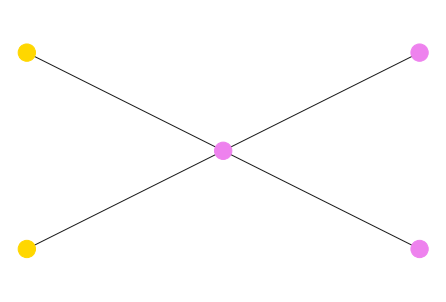

In [38]:
subset_sizes = [2, 1, 2]
subset_color = [
    "gold",
    "violet",
    "violet",
    "violet",
    "violet",
    "limegreen",
    "limegreen",
    "darkorange",
]


def multilayered_graph(*subset_sizes):
    extents = pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    print(layers[0], layers[1])
    print(list(itertools.product(layers[0], layers[1])))
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G


G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")
#plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=color, with_labels=False)
plt.axis("equal")
plt.show()